<p><img alt="Colaboratory logo" height="45px" src="https://vitalflux.com/wp-content/uploads/2022/08/voting-ensemble-method.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Exemplo de Ensemble - Regressão</h1>

Um ensemble, em aprendizado de máquina, refere-se à combinação de vários modelos preditivos para melhorar a precisão e o desempenho geral do sistema. Em vez de depender de um único modelo para tomar decisões, um ensemble utiliza a sabedoria coletiva de diversos modelos para produzir previsões mais robustas e confiáveis.

A ideia fundamental por trás dos ensembles é que, embora um modelo individual possa ter limitações ou tendências a erros em certos casos, a combinação de vários modelos pode atenuar essas fraquezas, resultando em um desempenho mais sólido e geralmente mais robusto. Ensembles são frequentemente utilizados em competições de ciência de dados e em aplicações do mundo real, onde a precisão é crucial e a redução do risco de overfitting é desejada.

<p align=center>
  <img src="https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor_files/stackingregression_overview.png" width="500px">
</p>

### Exemplo básico para problemas de `Regressao`

Na simulação que será realizada nesse exemplo serão utilizados os seguintes elementos:

- Base de dados: `Criada Sinteticamente`
- Configuração dos dados: `--`;
- Modelo: `Linear Regression, Ridge, SVR`.


In [ ]:
# Importanto as bibliotecas Python necessarias ao experimento
# Manipulacao matricial e visualizacao grafica
#--------------------------------------------------
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import warnings
#--------------------------------------------------
warnings.simplefilter('ignore')
#--------------------------------------------------
# Gerando a base de dados Sinteticamente
np.random.seed(1)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

In [ ]:
#--------------------------------------------------
#Inicializando os modelos de ajuste
#--------------------------------------------------
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_poly = SVR(kernel='poly')
#--------------------------------------------------
#Inicializando os modelos que sera o metamodelo
svr_rbf = SVR(kernel='rbf')

Mean Squared Error LR: 0.4777
Variance Score LR: 0.3087
-------------------------------------------------------


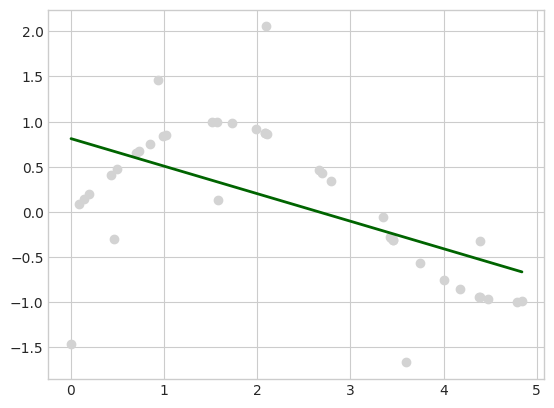

In [ ]:
#--------------------------------------------------
#Inicializando e treinando o modelo Linear Regression
#--------------------------------------------------
lr.fit(X,y)
print("Mean Squared Error LR: %.4f"
      % np.mean((lr.predict(X) - y) ** 2))
print('Variance Score LR: %.4f' % lr.score(X, y))
with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, lr.predict(X), c='darkgreen', lw=2)
print('-------------------------------------------------------')

Mean Squared Error SVR_Lin: 0.4980
Variance Score SVR_Lin: 0.2793
-------------------------------------------------------


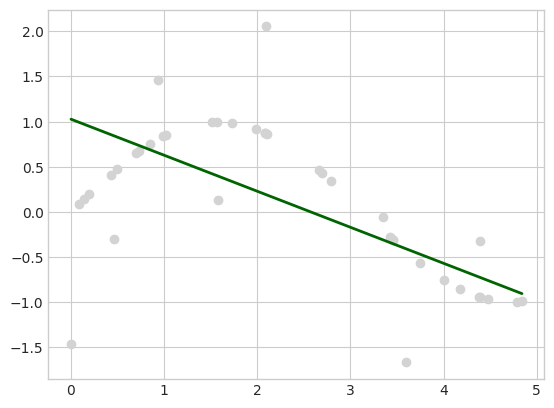

In [ ]:
#--------------------------------------------------
#Inicializando e treinando o modelo SVR Lin
#--------------------------------------------------
svr_lin.fit(X,y)
print("Mean Squared Error SVR_Lin: %.4f"
      % np.mean((svr_lin.predict(X) - y) ** 2))
print('Variance Score SVR_Lin: %.4f' % svr_lin.score(X, y))
with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, svr_lin.predict(X), c='darkgreen', lw=2)
print('-------------------------------------------------------')

Mean Squared Error Ridge: 0.4777
Variance Score Ridge: 0.3087
-------------------------------------------------------


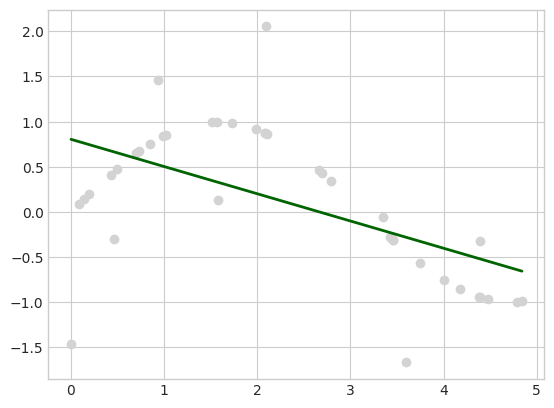

In [ ]:
#--------------------------------------------------
#Inicializando e treinando o modelo Ridge
#--------------------------------------------------
ridge.fit(X,y)
print("Mean Squared Error Ridge: %.4f"
      % np.mean((ridge.predict(X) - y) ** 2))
print('Variance Score Ridge: %.4f' % ridge.score(X, y))
with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, ridge.predict(X), c='darkgreen', lw=2)
print('-------------------------------------------------------')

Mean Squared Error SVR_Poly: 0.3511
Variance Score SVR_Poly: 0.4920
-------------------------------------------------------


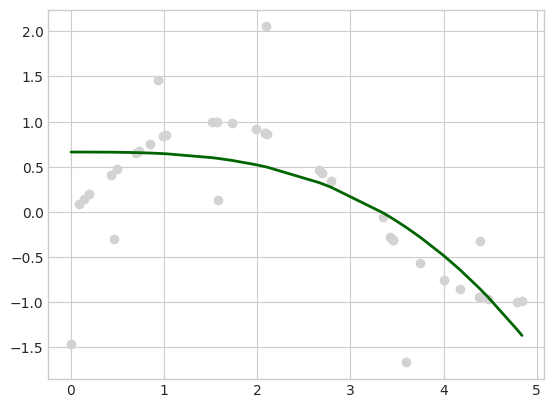

In [ ]:
#--------------------------------------------------
#Inicializando e treinando o modelo SVR Poly
#--------------------------------------------------
svr_poly.fit(X,y)
print("Mean Squared Error SVR_Poly: %.4f"
      % np.mean((svr_sig.predict(X) - y) ** 2))
print('Variance Score SVR_Poly: %.4f' % svr_sig.score(X, y))
with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, svr_poly.predict(X), c='darkgreen', lw=2)
print('-------------------------------------------------------')

-------------------------------------------------------
Mean Squared Error Stacking: 0.1823
Variance Score Stacking: 0.7362
-------------------------------------------------------


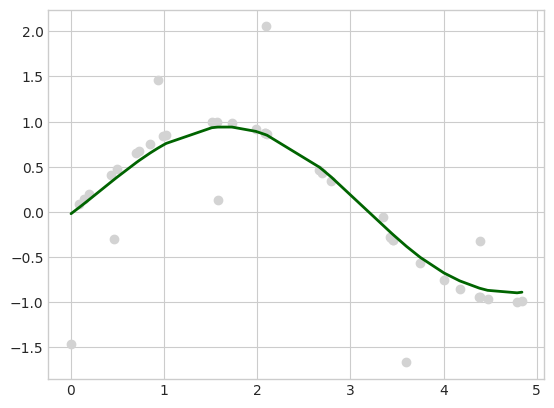

In [ ]:
#--------------------------------------------------
#Inicializando e treinando o modelo Stacking
#--------------------------------------------------
stregr = StackingRegressor(regressors=[svr_lin, lr, ridge, svr_poly], meta_regressor=svr_rbf)
stregr.fit(X, y)
print('-------------------------------------------------------')
print("Mean Squared Error Stacking: %.4f"
      % np.mean((stregr.predict(X) - y) ** 2))
print('Variance Score Stacking: %.4f' % stregr.score(X, y))
print('-------------------------------------------------------')
with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, stregr.predict(X), c='darkgreen', lw=2)